In [10]:
#!pip install uv
!pip install autogluon.timeseries


[notice] A new release of pip is available: 23.3.1 -> 24.1
[notice] To update, run: C:\Users\nilsw\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import yfinance as yf

C:\Users\nilsw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
file_path = 'data\EURUSD_15.csv'
df = pd.read_csv(file_path)
df.tail()

,item_id,Close,Datetime
27816,EURUSD,1.0845,2024-05-31 17:45:00
27817,EURUSD,1.0850,2024-05-31 18:00:00
27818,EURUSD,1.0848,2024-05-31 18:15:00
27819,EURUSD,1.0846,2024-05-31 18:30:00
27820,EURUSD,1.0848,2024-05-31 18:45:00


In [90]:
df.tail()

,item_id,Close,Datetime
27816,EURUSD,1.0845,2024-05-31 17:45:00
27817,EURUSD,1.0850,2024-05-31 18:00:00
27818,EURUSD,1.0848,2024-05-31 18:15:00
27819,EURUSD,1.0846,2024-05-31 18:30:00
27820,EURUSD,1.0848,2024-05-31 18:45:00


In [4]:
prediction_length = 96

In [5]:
train = df[(df['Datetime'] <= '2024-05-29 23:45:00')]

In [6]:
test = df[(df['Datetime'] >= '2024-05-29 00:00:00') & (df['Datetime'] <= '2024-05-31 00:00:00')]

In [7]:
print(test)

      item_id   Close             Datetime
27555  EURUSD  1.0850  2024-05-29 00:00:00
27556  EURUSD  1.0851  2024-05-29 00:15:00
27557  EURUSD  1.0848  2024-05-29 00:30:00
27558  EURUSD  1.0847  2024-05-29 00:45:00
27559  EURUSD  1.0845  2024-05-29 01:00:00
...       ...     ...                  ...
27741  EURUSD  1.0830  2024-05-30 22:45:00
27742  EURUSD  1.0830  2024-05-30 23:00:00
27743  EURUSD  1.0829  2024-05-30 23:15:00
27744  EURUSD  1.0829  2024-05-30 23:30:00
27745  EURUSD  1.0819  2024-05-31 00:00:00

[191 rows x 3 columns]


In [8]:
df =  df[(df['Datetime'] <= '2024-05-31 00:00:00')]

In [9]:
train_data = TimeSeriesDataFrame.from_data_frame(
    train,
    id_column="item_id",
    timestamp_column="Datetime"
)
train_data.head()

Close
item_id timestamp                  
EURUSD  2023-04-17 06:30:00  1.0975
        2023-04-17 06:45:00  1.0971
        2023-04-17 07:00:00  1.0965
        2023-04-17 07:15:00  1.0971
        2023-04-17 07:30:00  1.0974

In [107]:
predictor = TimeSeriesPredictor(
    prediction_length=96,
    freq="15min",
    path="autogluon-model",
    target="Close",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=800,
)

Frequency '15min' stored as '15T'
Beginning AutoGluon training... Time limit = 800s
AutoGluon will save models to 'autogluon-model'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
GPU Count:          0
Memory Avail:       2.22 GB / 15.72 GB (14.2%)
Disk Space Avail:   686.34 GB / 953.01 GB (72.0%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': '15T',
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 96,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'Close',
 'time_limit': 800,
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency '15T'.
Pr

In [98]:
predictions = predictor.predict(train_data)
predictions.head()

data with frequency 'None' has been resampled to frequency '15T'.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean       0.1       0.2       0.3       0.4  \
item_id timestamp                                                               
EURUSD  2024-05-29 23:45:00  1.080754  1.078512  1.078914  1.079991  1.080414   
        2024-05-30 00:00:00  1.080745  1.078113  1.078817  1.079833  1.080141   
        2024-05-30 00:15:00  1.080691  1.077968  1.078786  1.079768  1.080108   
        2024-05-30 00:30:00  1.080571  1.077836  1.078739  1.079688  1.080025   
        2024-05-30 00:45:00  1.080553  1.077904  1.078856  1.079772  1.080036   

                                  0.5       0.6       0.7       0.8       0.9  
item_id timestamp                                                              
EURUSD  2024-05-29 23:45:00  1.080754  1.081071  1.081381  1.081671  1.082228  
        2024-05-30 00:00:00  1.080745  1.080988  1.081419  1.081661  1.082338  
        2024-05-30 00:15:00  1.080691  1.080950  1.081403  1.081607  1.082382  
        2024-05-30 00:30:00  1.080571  1.080877  1.081334  1.081515  1.082343  
        2024-05-30 00:45:00  1.080553  1.080921  1.081380  1.081523  1.082368

data with frequency 'None' has been resampled to frequency '15T'.


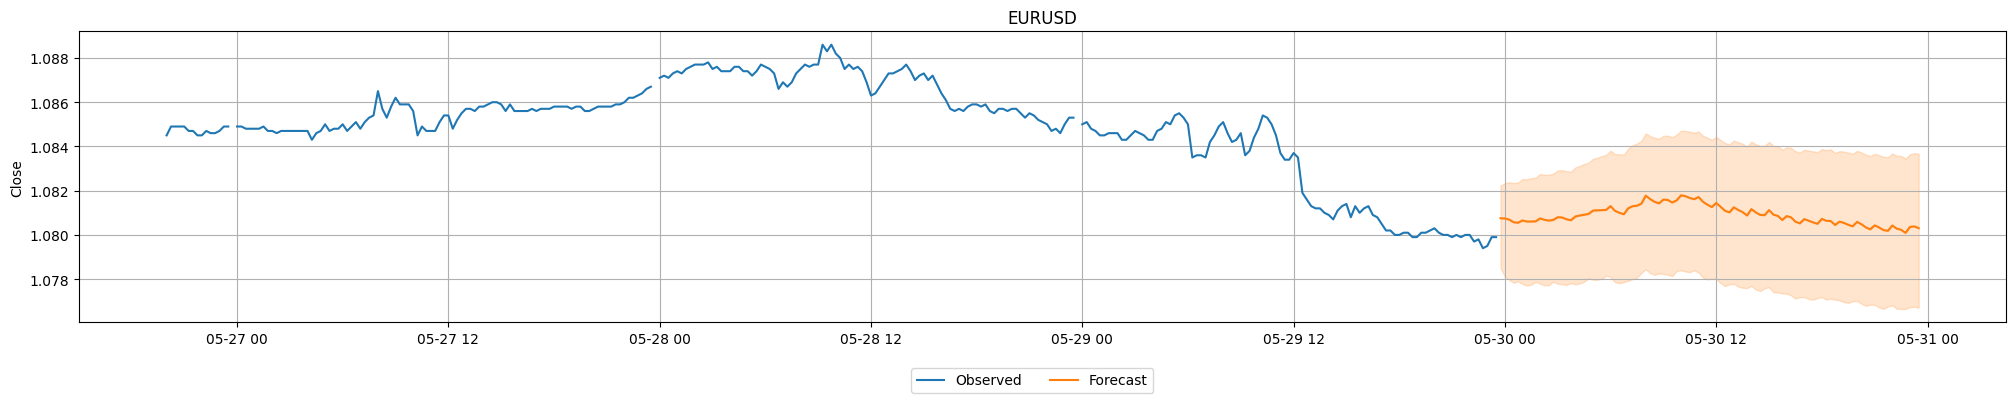

In [106]:
predictor.plot(train_data, predictions, quantile_levels=[0.1, 0.9], max_history_length=400, max_num_item_ids=4)


In [100]:
test

,item_id,Close,Datetime
27555,EURUSD,1.0850,2024-05-29 00:00:00
27556,EURUSD,1.0851,2024-05-29 00:15:00
27557,EURUSD,1.0848,2024-05-29 00:30:00
27558,EURUSD,1.0847,2024-05-29 00:45:00
27559,EURUSD,1.0845,2024-05-29 01:00:00
...,...,...,...
27741,EURUSD,1.0830,2024-05-30 22:45:00
27742,EURUSD,1.0830,2024-05-30 23:00:00
27743,EURUSD,1.0829,2024-05-30 23:15:00
27744,EURUSD,1.0829,2024-05-30 23:30:00


In [101]:
print(test.head())

      item_id   Close             Datetime
27555  EURUSD  1.0850  2024-05-29 00:00:00
27556  EURUSD  1.0851  2024-05-29 00:15:00
27557  EURUSD  1.0848  2024-05-29 00:30:00
27558  EURUSD  1.0847  2024-05-29 00:45:00
27559  EURUSD  1.0845  2024-05-29 01:00:00


In [10]:
test_data = TimeSeriesDataFrame.from_data_frame(
    test,
    id_column="item_id",
    timestamp_column="Datetime"
)




In [103]:
print(test_data)

                              Close
item_id timestamp                  
EURUSD  2024-05-29 00:00:00  1.0850
        2024-05-29 00:15:00  1.0851
        2024-05-29 00:30:00  1.0848
        2024-05-29 00:45:00  1.0847
        2024-05-29 01:00:00  1.0845
...                             ...
        2024-05-30 22:45:00  1.0830
        2024-05-30 23:00:00  1.0830
        2024-05-30 23:15:00  1.0829
        2024-05-30 23:30:00  1.0829
        2024-05-31 00:00:00  1.0819

[191 rows x 1 columns]


data with frequency 'None' has been resampled to frequency '15T'.


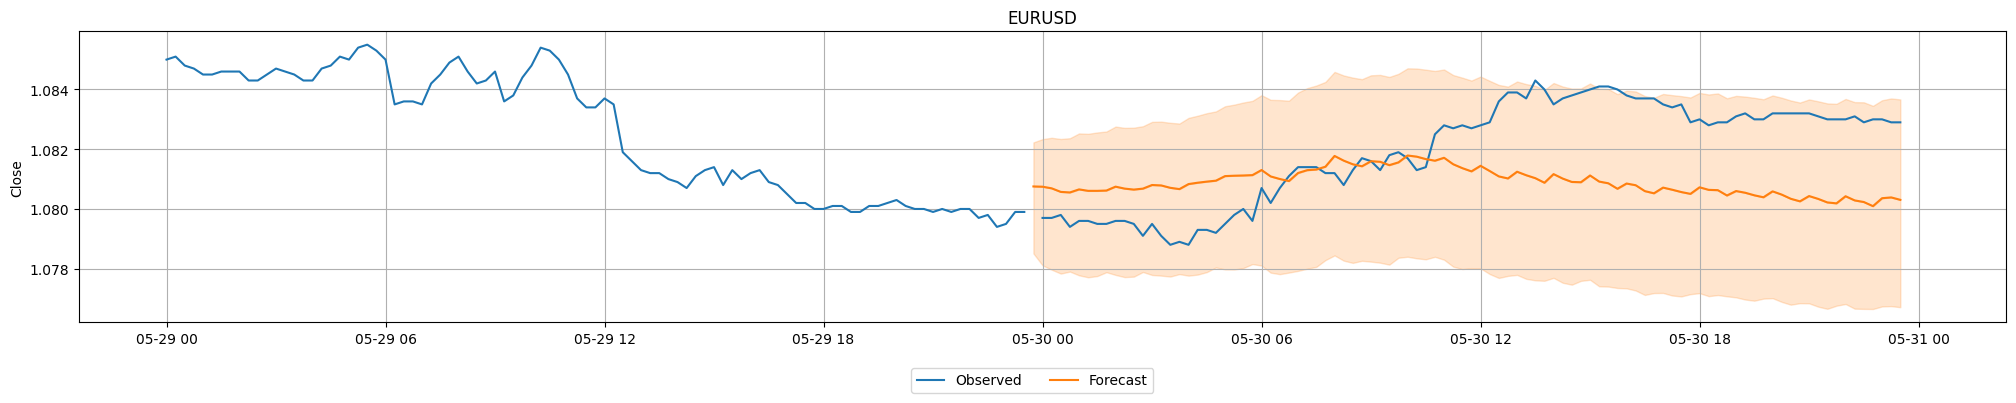

In [104]:
# Plot 4 randomly chosen time series and the respective forecasts
predictor.plot(test_data, predictions, quantile_levels=[0.1, 0.9], max_history_length=1000, max_num_item_ids=4)

In [108]:
predictor = TimeSeriesPredictor(
    prediction_length=96,
    freq="15min",
    path="autogluon-model",
    target="Close",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="high_quality",
    time_limit=800,
)

Frequency '15min' stored as '15T'
Beginning AutoGluon training... Time limit = 800s
AutoGluon will save models to 'autogluon-model'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
GPU Count:          0
Memory Avail:       2.64 GB / 15.72 GB (16.8%)
Disk Space Avail:   686.34 GB / 953.01 GB (72.0%)
Setting presets to: high_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': '15T',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 96,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'Close',
 'time_limit': 800,
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency '15T'.
Pr

In [109]:
predictions = predictor.predict(train_data)

data with frequency 'None' has been resampled to frequency '15T'.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


data with frequency 'None' has been resampled to frequency '15T'.


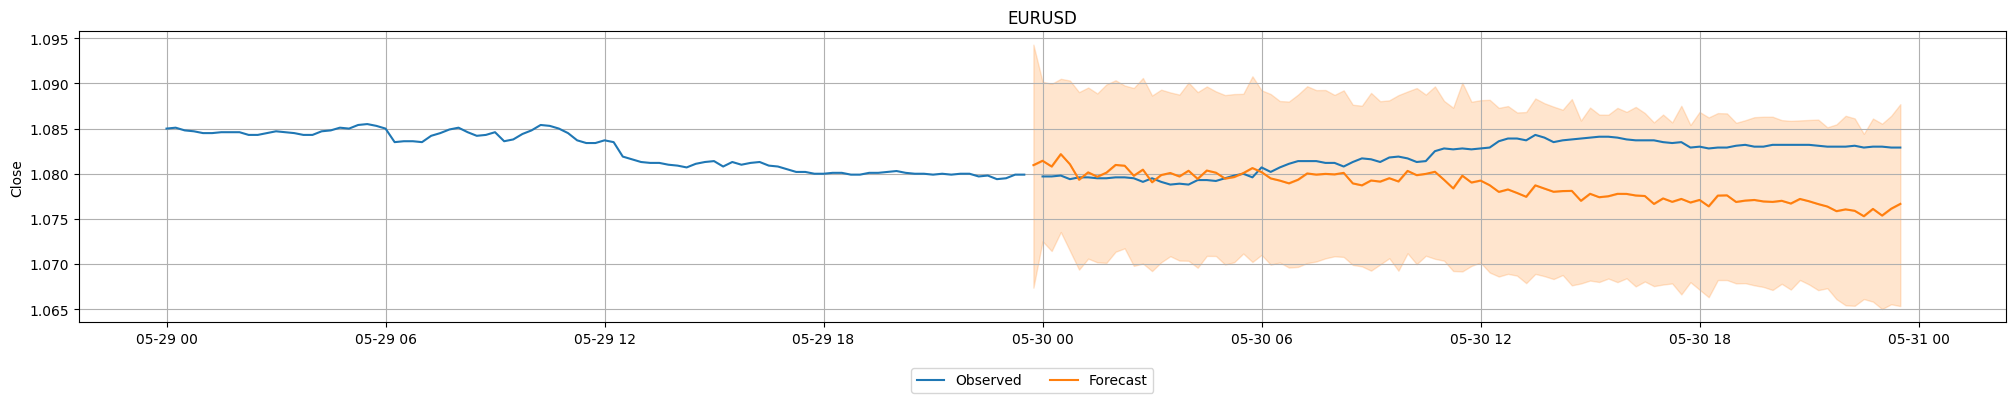

In [112]:
predictor.plot(test_data, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)

In [115]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()

In [116]:
if cuda_available:
    # Get the number of GPUs available
    num_gpus = torch.cuda.device_count()
    print(f"CUDA is available with {num_gpus} GPU(s)!")
else:
    print("CUDA is not available.")

CUDA is not available.


In [117]:
import tensorflow as tf

# Check if CUDA is available
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("CUDA is available!")
else:
    print("CUDA is not available.")

CUDA is not available.


In [19]:
predictor = TimeSeriesPredictor(
    prediction_length=96,
    freq="15min",
    path="autogluon-model_chronos",
    target="Close",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="best_quality",
    time_limit=800,
)

Frequency '15min' stored as '15T'
Beginning AutoGluon training... Time limit = 800s
AutoGluon will save models to 'autogluon-model_chronos'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
GPU Count:          0
Memory Avail:       3.35 GB / 15.72 GB (21.3%)
Disk Space Avail:   688.74 GB / 953.01 GB (72.3%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': '15T',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 2,
 'prediction_length': 96,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'Close',
 'time_limit': 800,
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency '

In [18]:
predictions = predictor.predict(train_data)

data with frequency 'None' has been resampled to frequency '15T'.
Model not specified in predict, will default to the model with the best validation score: Chronos[mini]


data with frequency 'None' has been resampled to frequency '15T'.


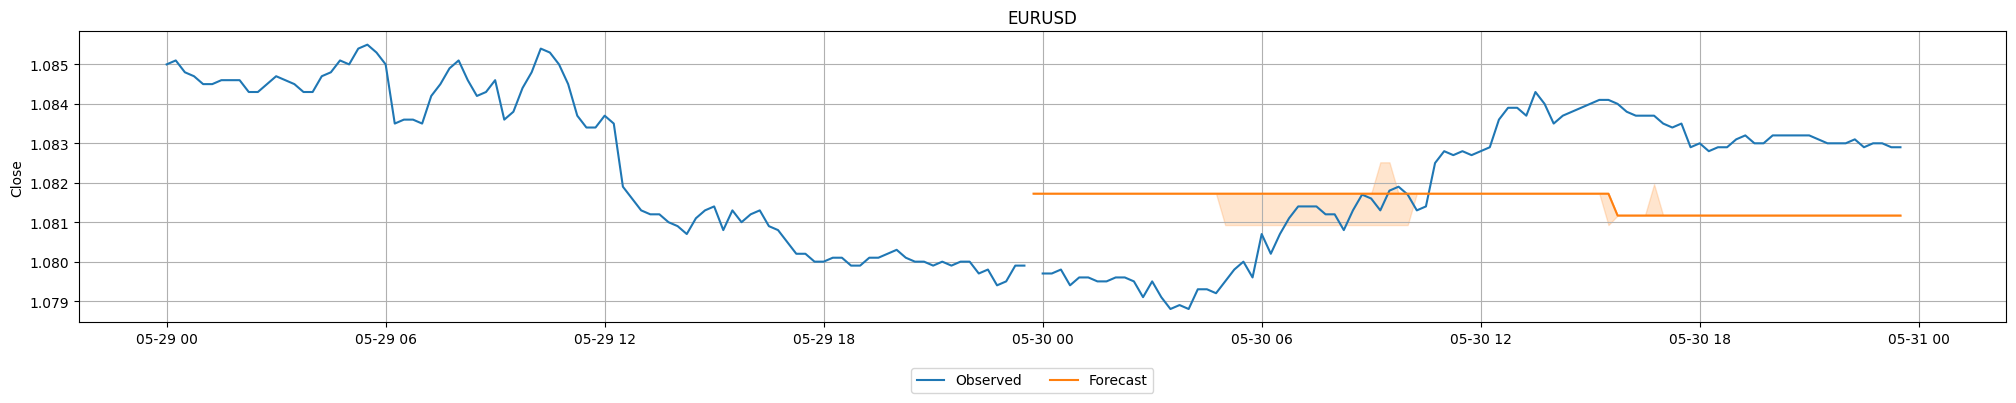

In [14]:
predictor.plot(test_data, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)